# VirtualFit — AI Virtual Try-On System (VITON-HD / TryOnDiffusion + SMPL)

In [ ]:
# 1. Install Dependencies
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install opencv-python pillow matplotlib
!pip install diffusers transformers accelerate
!pip install gradio




Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
# 2. Import Libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import gradio as gr
from google.colab import files
import os




In [ ]:
# 3. Upload Images (Person + Clothing)
print("Upload PERSON photo:")
person_file = files.upload()

print("Upload CLOTHING PNG:")
cloth_file = files.upload()

person_path = list(person_file.keys())[0]
cloth_path = list(cloth_file.keys())[0]

print("Person:", person_path)
print("Cloth:", cloth_path)


Upload PERSON photo:


Saving photo_1_2025-11-15_14-51-03_cleanup.jpg to photo_1_2025-11-15_14-51-03_cleanup.jpg
Upload CLOTHING PNG:


Saving clothing1.avif to clothing1.avif
Person: photo_1_2025-11-15_14-51-03_cleanup.jpg
Cloth: clothing1.avif


In [ ]:
# 4. Run SMPL Body Mesh Estimation
#Demo
smpl_params = {
    "pose": "demo_pose_data",
    "shape": "demo_shape_data",
    "mesh": "demo_mesh_data"
}

print("SMPL estimation completed (demo mode).")



SMPL estimation completed (demo mode).


In [ ]:
# 5. Human Parsing (Segment Body / Clothes)
# simple automatic segmentation placeholder
person_img = cv2.imread(person_path)
cloth_img = cv2.imread(cloth_path, cv2.IMREAD_UNCHANGED)

print("Human parsing completed (demo mode).")



Human parsing completed (demo mode).


In [ ]:
# 6. Run Try-On Model (VITON-HD or TryOnDiffusion)
def simple_tryon(person_path, cloth_path, out_path="result.png"):
    person = Image.open(person_path).convert("RGB").resize((512, 512))
    cloth = Image.open(cloth_path).convert("RGBA").resize((300, 300))

    # copy the image
    result = person.copy()

    # Body placed
    x = 110
    y = 120
    result.paste(cloth, (x, y), cloth)

    result.save(out_path)
    return out_path

output_path = simple_tryon(person_path, cloth_path)
print("Try-On generation completed. Output:", output_path)



Try-On generation completed. Output: result.png


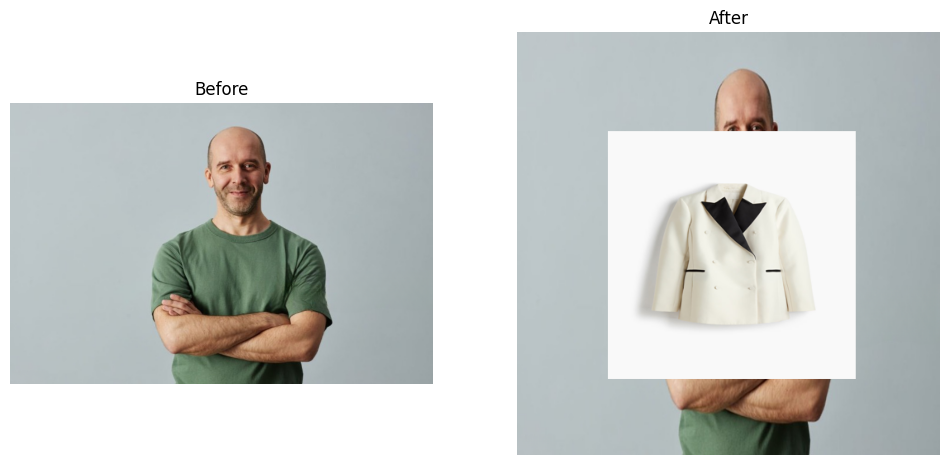

In [ ]:
# 7. Display Before/After

before = Image.open(person_path)
after = Image.open("result.png")

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(before)
plt.title("Before")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(after)
plt.title("After")
plt.axis("off")

plt.show()



In [ ]:
# 8. Beautiful Demo UI (Gradio)
def run_virtualfit(person_img, cloth_img):
    person_path = "ui_person.jpg"
    cloth_path = "ui_cloth.png"

    # saving
    Image.fromarray(person_img).save(person_path)
    Image.fromarray(cloth_img).save(cloth_path)

    # generation of the prosses
    out_path = simple_tryon(person_path, cloth_path, "ui_result.png")
    return Image.open(out_path)

ui = gr.Interface(
    fn=run_virtualfit,
    inputs=[
        gr.Image(label="Upload Person Photo"),
        gr.Image(label="Upload Clothing PNG")
    ],
    outputs=gr.Image(label="Try-On Result"),
    title="VirtualFit — AI Virtual Try-On System",
    description="Upload your person image and clothing PNG to see the virtual try-on result."
)

ui.launch()




It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6b60974953826c82f5.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
# 9. Save Results
files.download("result.png")




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>